In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()


In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurements= Base.classes.measurement
Station= Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
test= session.query(Measurements).limit(5).all()
for test in test:
     print(test.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000001F525874CD0>, 'prcp': 0.08, 'station': 'USC00519397', 'tobs': 65.0, 'date': '2010-01-01', 'id': 1}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000001F525874E80>, 'prcp': 0.0, 'station': 'USC00519397', 'tobs': 63.0, 'date': '2010-01-02', 'id': 2}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000001F525874EB0>, 'prcp': 0.0, 'station': 'USC00519397', 'tobs': 74.0, 'date': '2010-01-03', 'id': 3}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000001F525874F10>, 'prcp': 0.0, 'station': 'USC00519397', 'tobs': 76.0, 'date': '2010-01-04', 'id': 4}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000001F525874F70>, 'prcp': None, 'station': 'USC00519397', 'tobs': 73.0, 'date': '2010-01-06', 'id': 5}


In [11]:
from sqlalchemy import create_engine, inspect
# Get a list of column names and types
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns1 = inspector.get_columns('station')
for c in columns1:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
session.query(func.count(Measurements.date)).all()

[(19550)]

In [15]:
session.query(Measurements.date).order_by(Measurements.date).first()

('2010-01-01')

In [45]:
most_recent= session.query(Measurements.date).order_by(Measurements.date.desc()).first()
most_recent

('2017-08-23')

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import datetime as dt
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)


Query Date:  2016-08-23


In [78]:
# Perform a query to retrieve the data and precipitation scores
sel=[Measurements.station,
     Measurements.date,
      Measurements.prcp,
    Measurements.tobs]

precip_year=session.query(*sel).filter((Measurements.date) >=query_date).group_by(Measurements.date).all()
precip_year

[('USC00519397', '2016-08-23', 0.0, 81.0),
 ('USC00519397', '2016-08-24', 0.08, 79.0),
 ('USC00519397', '2016-08-25', 0.08, 80.0),
 ('USC00519397', '2016-08-26', 0.0, 79.0),
 ('USC00519397', '2016-08-27', 0.0, 77.0),
 ('USC00519397', '2016-08-28', 0.01, 78.0),
 ('USC00519397', '2016-08-29', 0.0, 78.0),
 ('USC00519397', '2016-08-30', 0.0, 79.0),
 ('USC00519397', '2016-08-31', 0.13, 80.0),
 ('USC00519397', '2016-09-01', 0.0, 81.0),
 ('USC00519397', '2016-09-02', 0.0, 80.0),
 ('USC00519397', '2016-09-03', 0.0, 79.0),
 ('USC00519397', '2016-09-04', 0.03, 75.0),
 ('USC00519397', '2016-09-05', None, 79.0),
 ('USC00519397', '2016-09-06', None, 76.0),
 ('USC00519397', '2016-09-07', 0.05, 76.0),
 ('USC00519397', '2016-09-08', 0.0, 80.0),
 ('USC00519397', '2016-09-09', 0.03, 79.0),
 ('USC00519397', '2016-09-10', 0.0, 78.0),
 ('USC00519397', '2016-09-11', 0.05, 76.0),
 ('USC00519397', '2016-09-12', 0.0, 78.0),
 ('USC00519397', '2016-09-13', 0.02, 78.0),
 ('USC00519397', '2016-09-14', 1.32, 75.0),

In [84]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(precip_year)
df

,station,date,prcp,tobs
0,USC00519397,2016-08-23,0.00,81.0
1,USC00519397,2016-08-24,0.08,79.0
2,USC00519397,2016-08-25,0.08,80.0
3,USC00519397,2016-08-26,0.00,79.0
4,USC00519397,2016-08-27,0.00,77.0
...,...,...,...,...
361,USC00519397,2017-08-19,0.00,79.0
362,USC00519397,2017-08-20,0.00,81.0
363,USC00519397,2017-08-21,0.00,81.0
364,USC00519397,2017-08-22,0.00,82.0


In [86]:
sort_df=df[["prcp","date"]]
sort_df

,prcp,date
0,0.00,2016-08-23
1,0.08,2016-08-24
2,0.08,2016-08-25
3,0.00,2016-08-26
4,0.00,2016-08-27
...,...,...
361,0.00,2017-08-19
362,0.00,2017-08-20
363,0.00,2017-08-21
364,0.00,2017-08-22


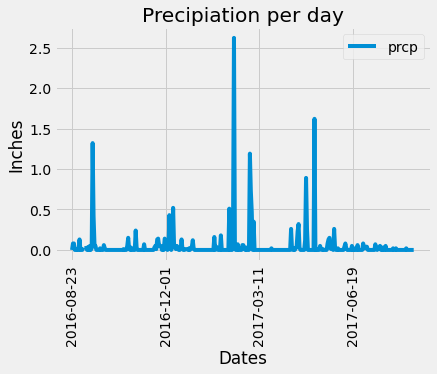

<Figure size 432x288 with 0 Axes>

In [107]:
# Use Pandas Plotting with Matplotlib to plot the data
sort_df.plot()
plt.title("Precipiation per day")
plt.ylabel("Inches")
plt.xlabel("Dates")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

In [92]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sort_df.describe()

,prcp
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Exploratory Station Analysis

In [99]:
# Design a query to calculate the total number stations in the dataset
df['station'].nunique()

3

In [102]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
df['station'].value_counts()

USC00519397    361
USC00513117      3
USC00514830      2
Name: station, dtype: int64

In [112]:
#Using iloc to isolate station id
station_df=df.loc[df['station']=='USC00519397']
station_df.head()

,station,date,prcp,tobs
0,USC00519397,2016-08-23,0.00,81.0
1,USC00519397,2016-08-24,0.08,79.0
2,USC00519397,2016-08-25,0.08,80.0
3,USC00519397,2016-08-26,0.00,79.0
4,USC00519397,2016-08-27,0.00,77.0


In [116]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mean_df=station_df.groupby('station').mean()['tobs']
max_df=station_df.groupby('station').max()['tobs']
min_df=station_df.groupby('station').min()['tobs']


station
USC00519397    60.0
Name: tobs, dtype: float64

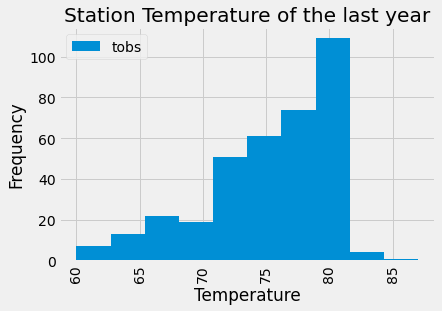

<Figure size 432x288 with 0 Axes>

In [139]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df=station_df[['tobs','station']]
temp_df.plot(kind="hist")
plt.title("Station Temperature of the last year")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

# Close session

In [ ]:
# Close Session
session.close()